<a href="https://www.kaggle.com/code/aaditshukla/retail-analysis?scriptVersionId=137075282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv



---
# Title: "Market Basket Analysis"
## Author: "Aadit Shukla"


<center><img
src="https://i.imgur.com/Opyn1vo.png">
</center>


# **1.Introduction**

Hello **Kagglers**! In this kernel we are going to use the **Apriori algorithm** to perform a **Market Basket Analysis**. A Market what? Is a technique used by large retailers to uncover associations between items.**.Market basket analysis used by **retailers to increase sales by better understanding customer purchasing patterns.**
It works by looking for combinations of items that occur together frequently in transactions, providing information to understand the purchase behavior. The outcome of this type of technique is, 
in simple terms, a set of **rules** .


# For more information about these topics, please check in the following links: 

* [Market Basket Analysis](https://en.wikipedia.org/wiki/Affinity_analysis)

* [Apriori algorithm](https://en.wikipedia.org/wiki/Apriori_algorithm)

* [Association rule learning](https://en.wikipedia.org/wiki/Association_rule_learning)

**To define the Apriori algorithm, including some statistical concepts  (support, confidence, lift and conviction)**

# ** 2.Association rules**

<center>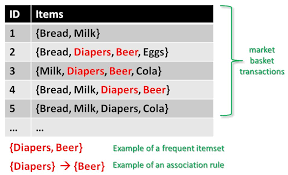
</center>


The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. 

# 3.Problem Staement : 
 Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
data.shape

(99457, 10)

In [5]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
data.describe(include='object')

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I138884,C241288,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

<Axes: >

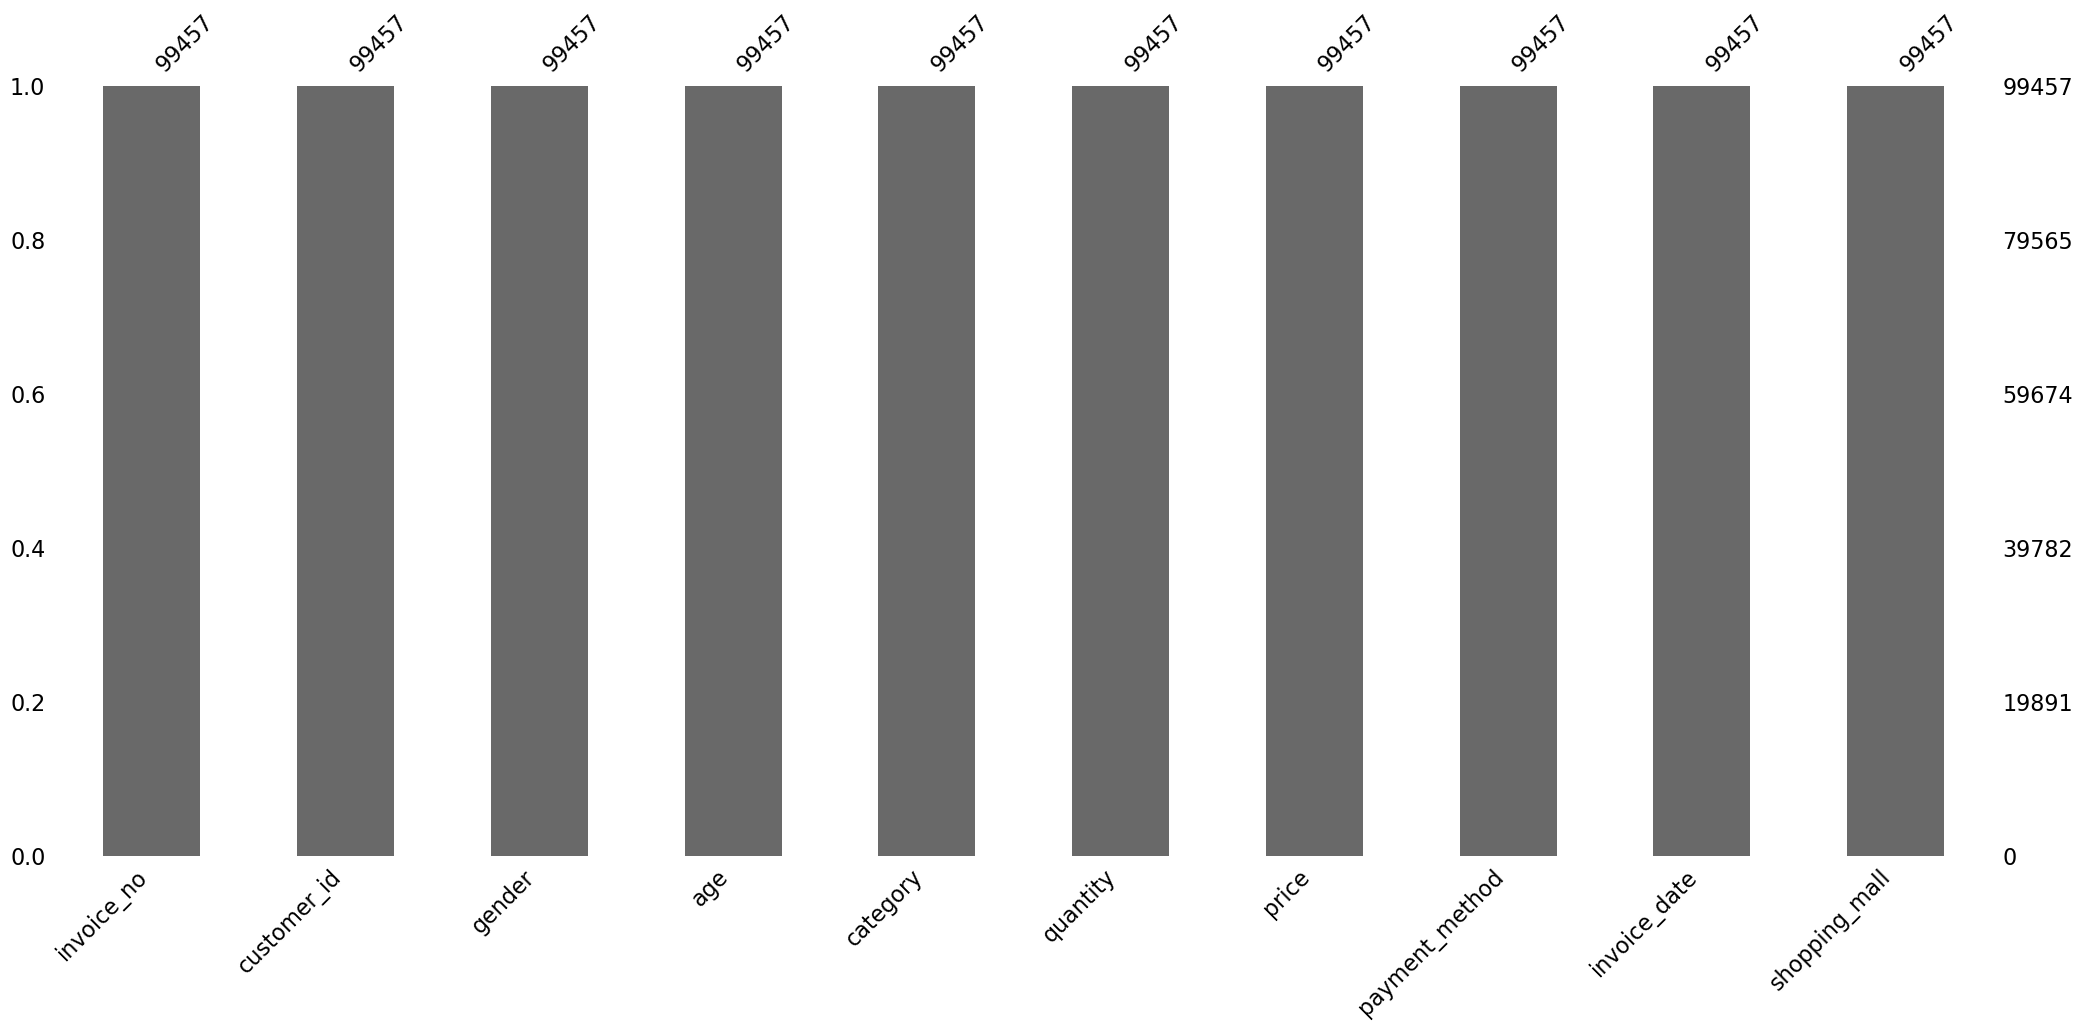

In [9]:
msno.bar(data)

# 4.Data Dictionary

    .  invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.
    . customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.
    . gender: String variable of the customer's gender.
    . age: Positive Integer variable of the customers age.
    . category: String variable of the category of the purchased product.
    . quantity: The quantities of each product (item) per transaction. Numeric.
    . price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).
    . payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.
    . invoice_date: Invoice date. The day when a transaction was generated.
    . shopping_mall: String variable of the name of the shopping mall where the transaction was made.


# 5.Data Analysis

Before applying the Apriori algorithm on the data set, we are going to show some visualizations.

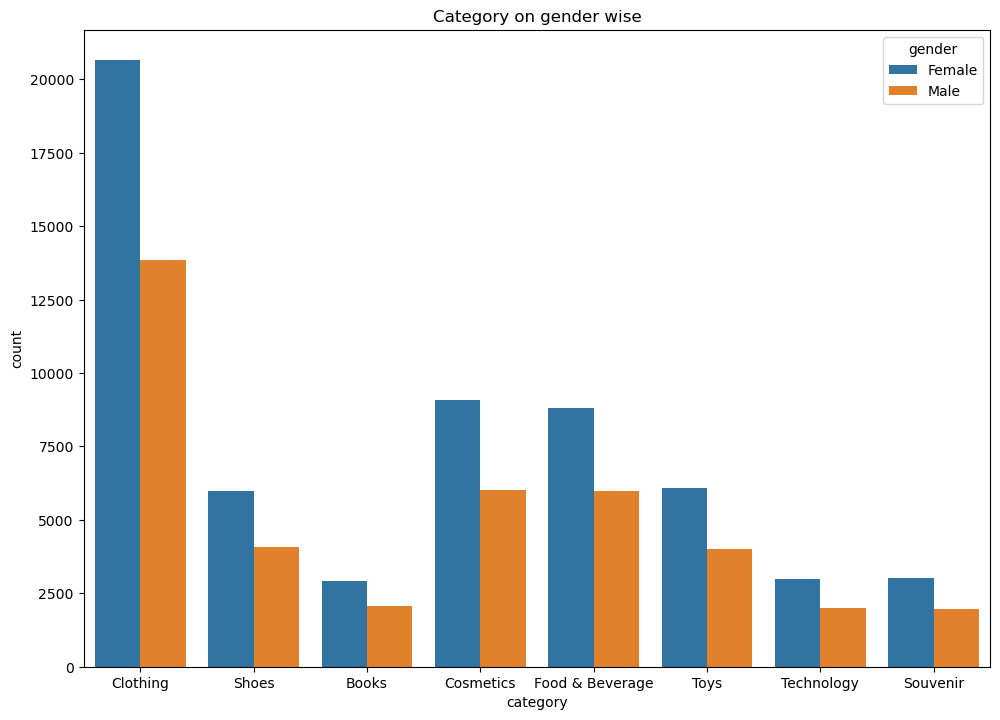

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x ='category',hue = "gender", data = data)
plt.title("Category on gender wise")
plt.show()

In [11]:
data['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

# Absolute Category Ferquency Plot

It is same as just the frequency where the number of occurrences of a data element is calculated.
For Example:


Following data are given about pass or fail of students in an exam held of Mathematics in a class.
P, P, F, P, F, P, P, F, F, P, P, P


where, P = Passed and F = Failed.

Solution:
From the given data we can say that,
There are 8 students who passed the exam
There are 4 students who failed the exam

In [12]:
df = pd.DataFrame(data,columns=["category"])
tab_result = pd.crosstab(index=data["category"],columns=["count"])
print(tab_result)

col_0            count
category              
Books             4981
Clothing         34487
Cosmetics        15097
Food & Beverage  14776
Shoes            10034
Souvenir          4999
Technology        4996
Toys             10087


In [13]:
df = pd.Series(data['category']).value_counts()
print(df)

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64


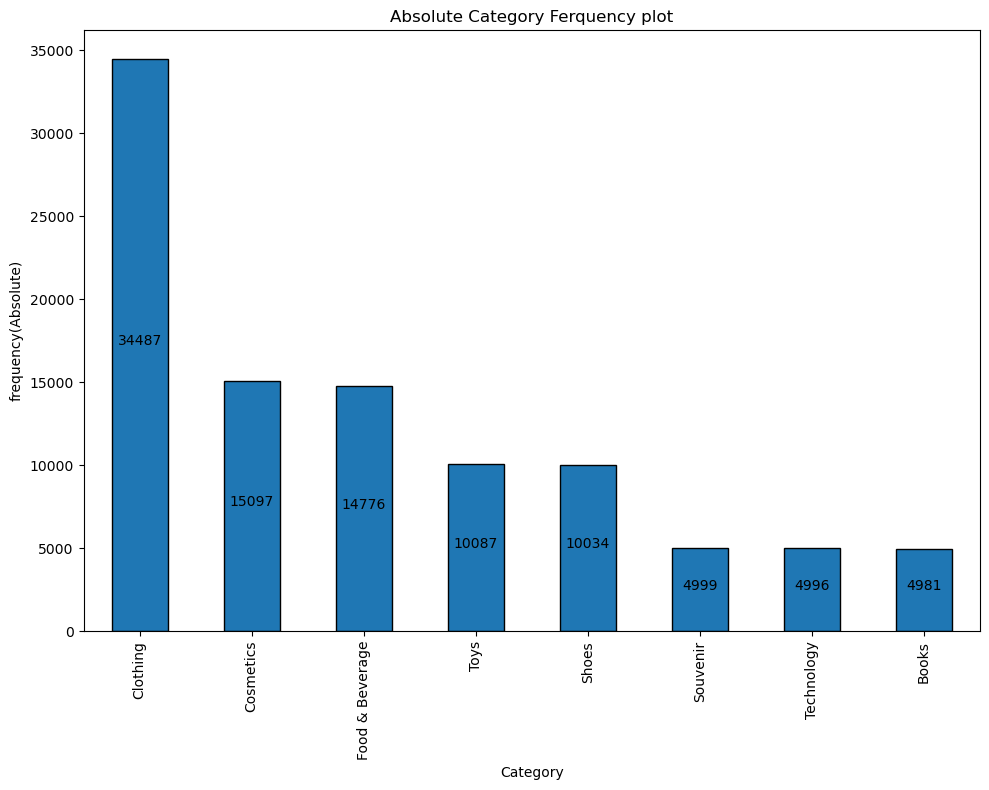

In [14]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

plt.rcParams["figure.figsize"] = [10,8]
plt.rcParams["figure.autolayout"] = True

x=['Clothing','Cosmetics','Food & Beverage','Toys','Shoes','Souvenir','Technology','Books']
y=[34487,15097,14776,10087,10034,4999,4996,4981]
fig, ax = plt.subplots()

df.plot(ax=ax, kind='bar', xlabel='Category', ylabel='frequency(Absolute)', edgecolor='black',title='Absolute Category Ferquency plot')
addlabels(x, y)
plt.show()

# Releative Category Ferquency Plot
It is the fraction of observations of a particular category in given data set. It has floating values and also represented in percentage.



###### This is a fraction between a given frequency and the total number of observations in a data sample. So the value can be a floating point value which can also be expressed as a percentage. To find it out we first calculate the frequency as shown in the first approach and then divide it with total number of observations which is found out using the len() function.



Let us consider the given example of passed and failed students in the Mathematics exam. Then,

relative frequency of passed students = 8 / ( 8 + 4 ) = 0.666 = 66.6 %
relative frequency of failed students = 4 / ( 8 + 4 ) = 0.333 = 33.3 %

In [15]:
re = pd.Series(data['category']).value_counts()
t=re/len(data)*100
t

Clothing           34.675287
Cosmetics          15.179424
Food & Beverage    14.856672
Toys               10.142071
Shoes              10.088782
Souvenir            5.026293
Technology          5.023276
Books               5.008194
Name: category, dtype: float64

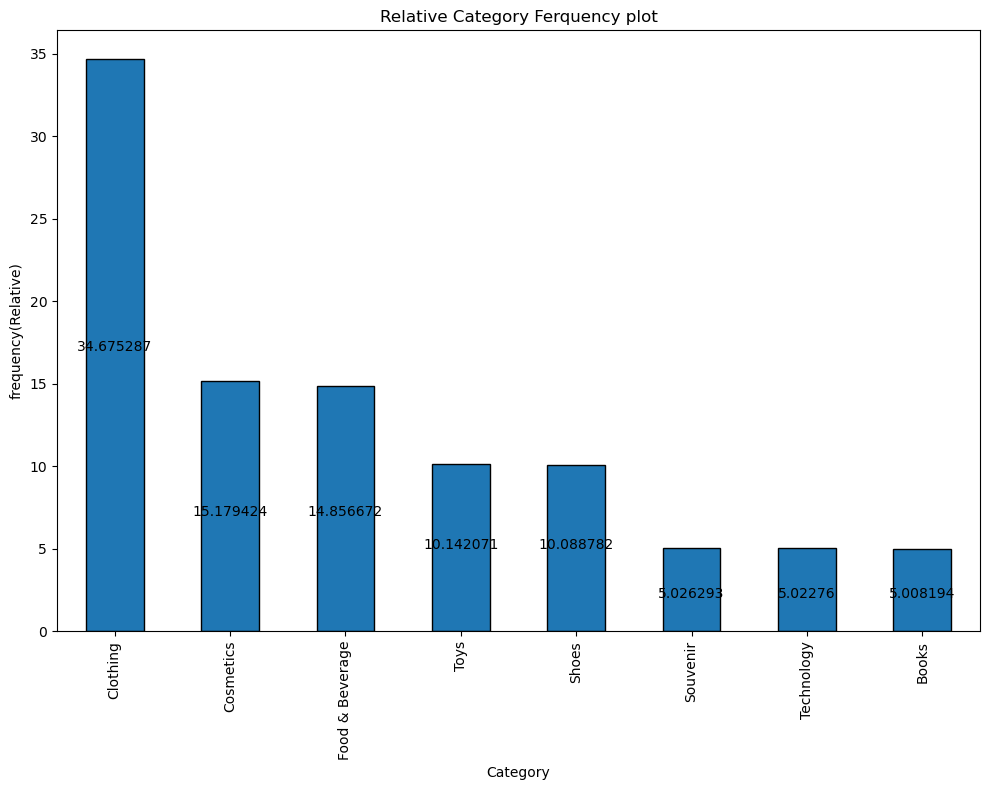

In [16]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

plt.rcParams["figure.figsize"] = [10,8]
plt.rcParams["figure.autolayout"] = True

x=['Clothing','Cosmetics','Food & Beverage','Toys','Shoes','Souvenir','Technology','Books']
y=[34.675287,15.179424,14.856672,10.142071,10.088782,5.026293,5.02276,5.008194]
fig, ax = plt.subplots()

t.plot(ax=ax, kind='bar', xlabel='Category', ylabel='frequency(Relative)', edgecolor='black',title='Relative Category Ferquency plot')
addlabels(x, y)
plt.show()

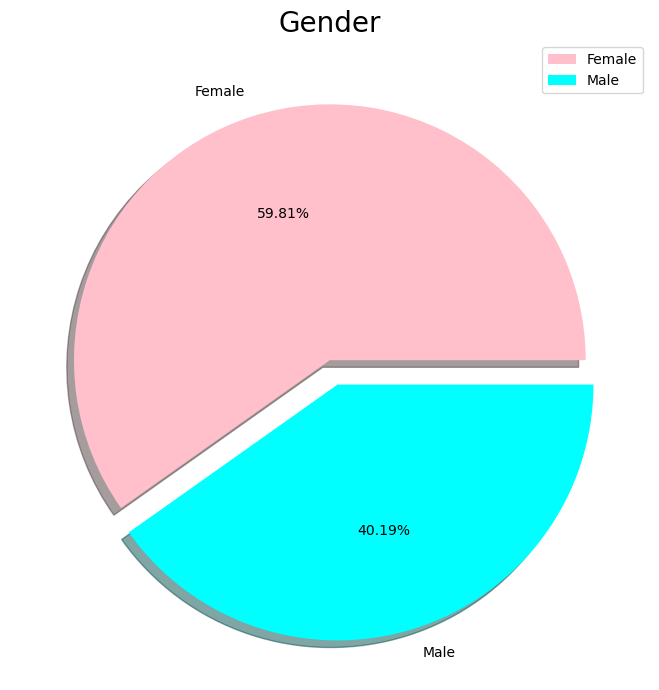

In [17]:
labels = ['Female', 'Male']
size = data['gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

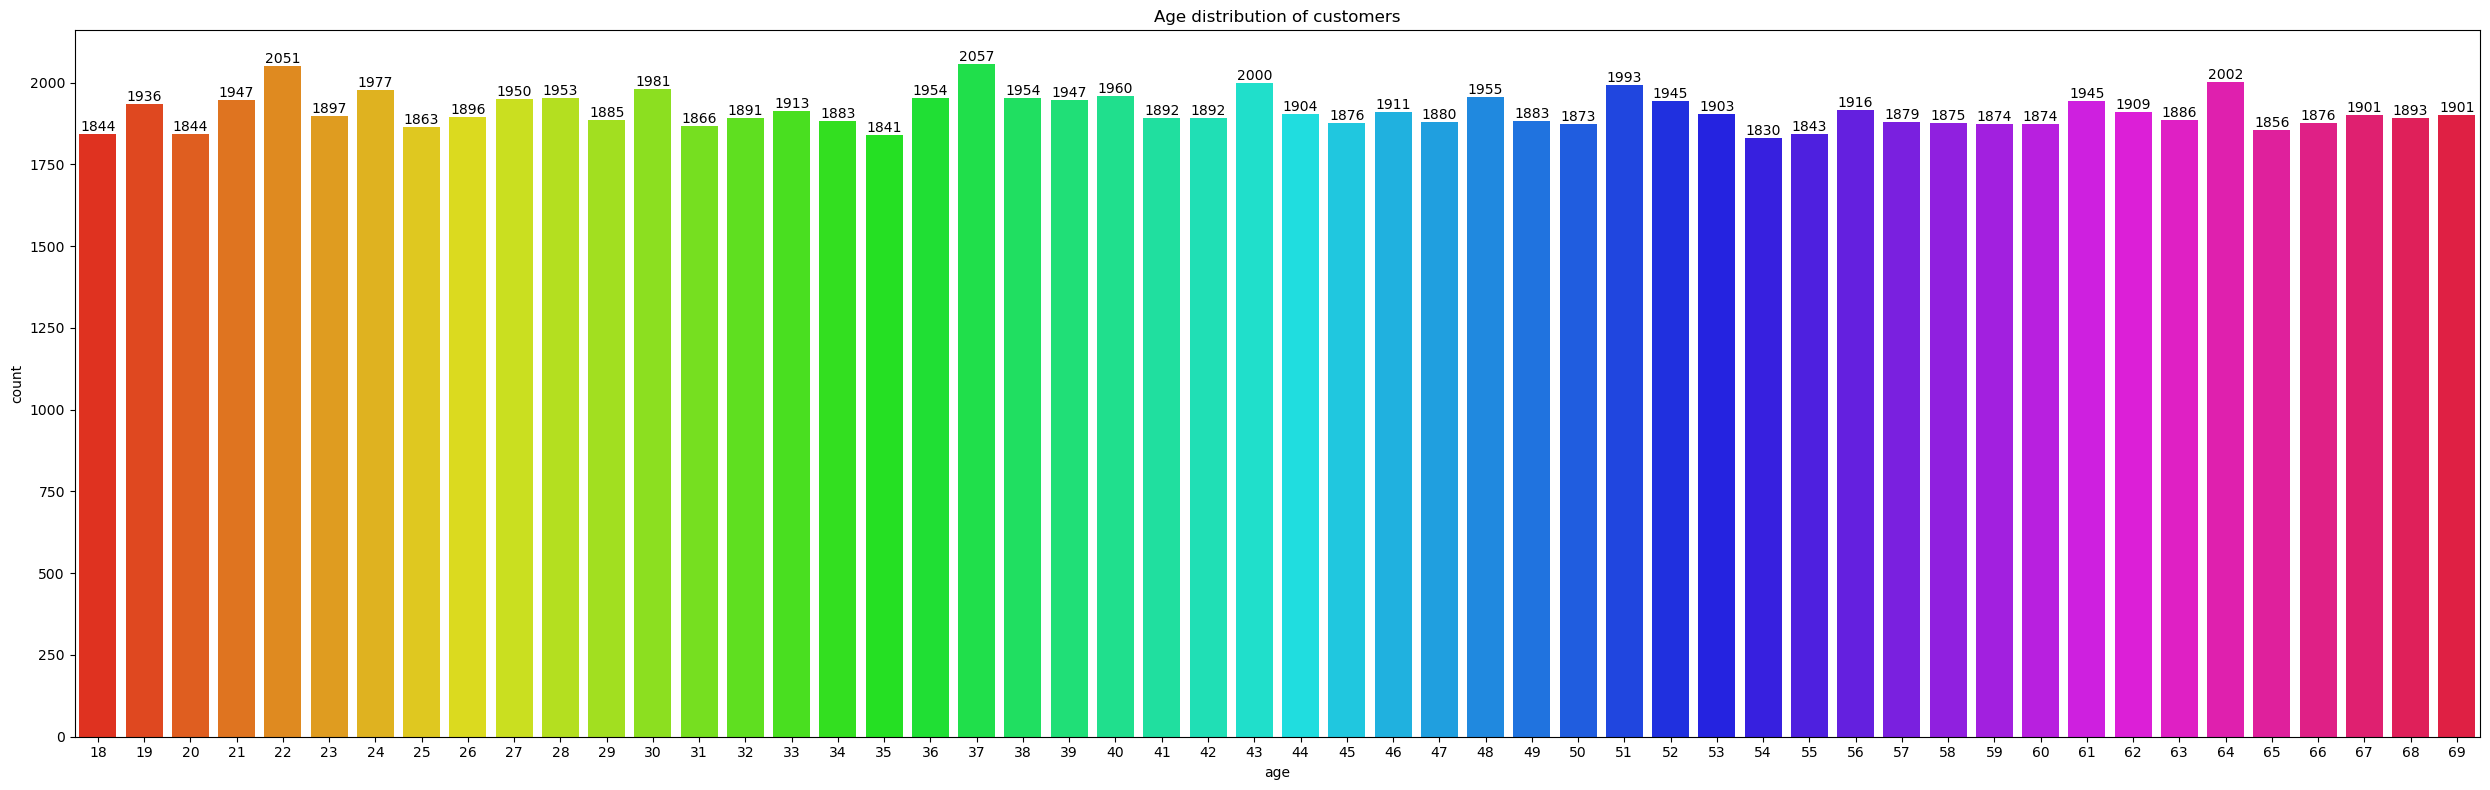

In [18]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=data['age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

In [19]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
